# Personalized Mentor Recommendation System for CLAT Aspirants

## Objective
I designed and implemented a simple AI/ML-based system that recommends suitable mentors (CLAT toppers) to law aspirants based on their preparation profile. The goal was to enhance engagement and improve aspirant outcomes through personalized mentorship.

---

## Approach Summary

I built a **content-based recommender system** using **semantic similarity** powered by **SBERT (Sentence-BERT)**. This method allowed me to match aspirants and mentors based on profile attributes encoded into natural language descriptions. I chose SBERT because it captures deeper context and meaning than traditional keyword-based systems.

I represented each aspirant and mentor as a detailed textual profile, embedding preparation level, preferred subjects, learning/teaching style, CLAT scores, rank, and availability. I then embedded these profiles into vector space and matched them using cosine similarity.

---

## Key Features Processed
- **Aspirant Attributes**:
  - Preferred CLAT subjects (e.g., Legal Reasoning, Logical Reasoning)
  - Target college
  - Preparation level (Beginner / Intermediate / Advanced)
  - Learning style
  - Weekly study hours
  - Goal rank and estimated CLAT rank
  - Mock test score history
  - Access to coaching
- **Mentor Attributes**:
  - Strength subjects
  - Teaching style and preferred mentee level
  - Availability per week
  - Mode of mentoring (online/offline/hybrid)
  - CLAT rank and score
  - Languages spoken

---

## Methodology

### 1. **Data Generation**
I created synthetic datasets with:
  - 100 mentors
  - 500 aspirants
  - 2,000 interactions (ratings)
I used realistic CLAT scoring distribution from 2023 data and engineered features aligned to official CLAT sections.

### 2. **Text Profile Construction**
I wrote natural language profiles for aspirants and mentors using their features.
Example:
> "Aspirant targeting NLSIU with preferred subjects: Legal Reasoning, Logical Reasoning..."

### 3. **SBERT Encoding**
I used the `all-MiniLM-L6-v2` model from `sentence-transformers` to encode all profiles into 384-dimensional embeddings. Then I calculated cosine similarity between aspirant and mentor profiles.

### 4. **Recommendation Logic**
For each aspirant, I extracted the top 3 mentors with the highest similarity scores.

### 5. **Visualization**
I created a clean, card-style match display for each aspirant, showing mentor info (name, rank, subjects, teaching style, and match score).

---

## Bonus: Feedback Loop for Future Improvements

To improve recommendations over time:
- I can collect mentor ratings from aspirants after each session
- I can use this feedback to re-rank or re-train the model
- I plan to experiment with collaborative filtering models (like SVD)
- Eventually, I can integrate a hybrid approach that combines semantic and rating-based recommendations

---

## Output Example
```json
{
  "aspirant_id": 0,
  "recommended_mentors": [86, 9, 98]
}
```

---

## Tools & Libraries Used
- Python (Google Colab)
- Pandas, NumPy, scikit-learn
- sentence-transformers (SBERT)
- Matplotlib (for visualizations)

---

## Conclusion
I successfully developed a personalized mentor recommendation system for CLAT aspirants using SBERT. The system is scalable, intuitive, and effective even without explicit user feedback. In the future, I plan to integrate ratings and evolve the system into a hybrid recommender model.

In [15]:
!pip install faker

In [16]:
import pandas as pd
import numpy as np
import random
from faker import Faker

fake = Faker()
random.seed(42)
np.random.seed(42)

# -----------------------------------------------------
# CLAT SUBJECTS
clat_subjects = [
    'English Language',
    'Current Affairs / GK',
    'Legal Reasoning',
    'Logical Reasoning',
    'Quantitative Techniques'
]

colleges = ['NLSIU', 'NALSAR', 'NLU Delhi', 'NLU Jodhpur', 'GNLU']
prep_levels = ['Beginner', 'Intermediate', 'Advanced']
styles = ['Visual', 'Auditory', 'Interactive', 'Reading/Writing']
time_slots = ['Morning', 'Afternoon', 'Evening']
genders = ['Male', 'Female', 'Other']
languages = ['English', 'Hindi', 'Tamil', 'Bengali']
modes = ['Online', 'Offline', 'Hybrid']

# -----------------------------------------------------
# Rank Distribution Based on CLAT 2023 (simplified score mapping)

clat_score_ranges = [
    (125, 150, 1), (120, 125, 2), (115, 120, 2), (110, 115, 1),
    (105, 110, 3), (100, 105, 10), (95, 100, 38), (90, 95, 116),
    (85, 90, 189), (80, 85, 381), (75, 80, 668), (70, 75, 907),
    (65, 70, 1254), (60, 65, 1628), (55, 60, 2084), (50, 55, 2557),
    (45, 50, 3153), (40, 45, 3752), (35, 40, 4389), (30, 35, 5307),
    (25, 30, 5746), (20, 25, 6132), (15, 20, 5746), (10, 15, 4818),
    (5, 10, 2799), (0, 5, 1273)
]

# Create weighted sampling base
clat_score_pool = []
for score_min, score_max, count in clat_score_ranges:
    score = (score_min + score_max) / 2
    clat_score_pool.extend([score] * count)

def infer_rank(score):
    for score_min, score_max, count in clat_score_ranges:
        if score_min <= score < score_max:
            low_rank = sum(c for smin, smax, c in clat_score_ranges if smin < score_min)
            return low_rank + random.randint(1, count)
    return 53227  # default fallback

def determine_prep_level(avg_score):
    if avg_score < 40:
        return 'Beginner'
    elif avg_score < 70:
        return 'Intermediate'
    else:
        return 'Advanced'

# -----------------------------------------------------
# Generate Aspirants (500)

aspirants = []
for i in range(500):
    mock_scores = np.round(np.random.normal(60, 15, 5), 2).clip(0, 120)
    avg_score = np.mean(mock_scores)
    clat_estimate = avg_score + np.random.normal(0, 5)
    clat_estimate = min(max(clat_estimate, 0), 120)
    estimated_rank = infer_rank(clat_estimate)

    aspirants.append({
        'aspirant_id': i,
        'name': fake.first_name(),
        'age': random.randint(16, 22),
        'gender': random.choice(genders),
        'preferred_subjects': random.sample(clat_subjects, k=random.randint(2, 3)),
        'target_college': random.choice(colleges),
        'prep_level': determine_prep_level(avg_score),
        'learning_style': random.choice(styles),
        'weekly_study_hours': random.randint(5, 25),
        'access_to_coaching': random.choice([True, False]),
        'mock_scores': mock_scores.tolist(),
        'avg_mock_score': round(avg_score, 2),
        'estimated_clat_score': round(clat_estimate, 2),
        'estimated_rank': estimated_rank,
        'goal_rank': random.randint(1, 2596),
        'preferred_time_slot': random.choice(time_slots)
    })

aspirants_df = pd.DataFrame(aspirants)

# -----------------------------------------------------
# Generate Mentors (100)

mentors = []
for i in range(100):
    mentor_score = float(random.choice(clat_score_pool))
    mentor_rank = infer_rank(mentor_score)

    mentors.append({
        'mentor_id': i,
        'name': fake.first_name(),
        'age': random.randint(22, 30),
        'gender': random.choice(genders),
        'strength_subjects': random.sample(clat_subjects, k=random.randint(2, 3)),
        'college_attended': random.choice(colleges),
        'preferred_mentee_level': random.choice(prep_levels),
        'teaching_style': random.choice(styles),
        'availability_per_week': random.randint(2, 10),
        'mode_of_mentoring': random.choice(modes),
        'languages_spoken': random.sample(languages, k=random.randint(1, 2)),
        'clat_score': round(mentor_score, 2),
        'clat_rank': mentor_rank
    })

mentors_df = pd.DataFrame(mentors)

# -----------------------------------------------------
# Ratings for collaborative filtering
interactions = []
for _ in range(2000):
    a_id = random.choice(aspirants_df['aspirant_id'].tolist())
    m_id = random.choice(mentors_df['mentor_id'].tolist())
    rating = random.randint(3, 5) if random.random() > 0.2 else random.randint(1, 2)
    interactions.append({
        'aspirant_id': a_id,
        'mentor_id': m_id,
        'rating': rating
    })

ratings_df = pd.DataFrame(interactions)

# -----------------------------------------------------
# Quick preview
print("Aspirants:", aspirants_df.shape)
print("Mentors:", mentors_df.shape)
print("Ratings:", ratings_df.shape)

# save
aspirants_df.to_csv('aspirants.csv', index=False)
mentors_df.to_csv('mentors.csv', index=False)
ratings_df.to_csv('ratings.csv', index=False)


Aspirants: (500, 16)
Mentors: (100, 13)
Ratings: (2000, 3)


# Encode Multi-label and Categorical Features

## Encode Subject Preferences

In [17]:
from sklearn.preprocessing import MultiLabelBinarizer

# Initialize binarizer for subjects
subject_encoder = MultiLabelBinarizer(classes=clat_subjects)

# Encode for aspirants
aspirant_subjects_encoded = subject_encoder.fit_transform(aspirants_df['preferred_subjects'])

# Encode for mentors
mentor_subjects_encoded = subject_encoder.transform(mentors_df['strength_subjects'])

##  Encode Learning and Teaching Styles

In [18]:
from sklearn.preprocessing import OneHotEncoder

# Initialize encoder with correct flag
style_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit on reshaped list of styles (no feature names)
style_encoder.fit(np.array(styles).reshape(-1, 1))

# Transform values without feature names to suppress warning
aspirant_styles_encoded = style_encoder.transform(aspirants_df['learning_style'].values.reshape(-1, 1))
mentor_styles_encoded = style_encoder.transform(mentors_df['teaching_style'].values.reshape(-1, 1))

## Encode Prep Level and Preferred Mentee Level

In [19]:
# Define levels to ensure consistency
level_categories = np.array(prep_levels).reshape(-1, 1)

# Create encoder and fit
level_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
level_encoder.fit(level_categories)

# Encode aspirants
aspirant_levels_encoded = level_encoder.transform(aspirants_df['prep_level'].values.reshape(-1, 1))

# Encode mentors
mentor_levels_encoded = level_encoder.transform(mentors_df['preferred_mentee_level'].values.reshape(-1, 1))

## Combine Encoded Features

In [20]:
# Combine all encoded features horizontally
aspirant_profiles = np.hstack([
    aspirant_subjects_encoded,
    aspirant_styles_encoded,
    aspirant_levels_encoded
])

mentor_profiles = np.hstack([
    mentor_subjects_encoded,
    mentor_styles_encoded,
    mentor_levels_encoded
])

print("Aspirant feature shape:", aspirant_profiles.shape)
print("Mentor feature shape:", mentor_profiles.shape)

Aspirant feature shape: (500, 12)
Mentor feature shape: (100, 12)


In [21]:
from sklearn.neighbors import NearestNeighbors


knn_model = NearestNeighbors(n_neighbors=3, metric='cosine')
knn_model.fit(mentor_profiles)

NearestNeighbors(metric='cosine', n_neighbors=3)

# Similarity-Based Recommendation

## Compute Cosine Similarity Matrix

In [22]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute cosine similarity between aspirants and all mentors
similarity_matrix = cosine_similarity(aspirant_profiles, mentor_profiles)

print("Similarity matrix shape:", similarity_matrix.shape)

Similarity matrix shape: (500, 100)


## Get Top 3 Mentor Recommendations per Aspirant

In [23]:
top_k = 3  # top 3 mentors

top_mentors = []
for i, row in enumerate(similarity_matrix):
    top_indices = np.argsort(row)[-top_k:][::-1]  # top 3 mentor indices (sorted)
    recommended_ids = mentors_df.iloc[top_indices]['mentor_id'].tolist()
    top_mentors.append({
        'aspirant_id': aspirants_df.iloc[i]['aspirant_id'],
        'recommended_mentors': recommended_ids
    })

recommendations_df = pd.DataFrame(top_mentors)
recommendations_df.head()

,aspirant_id,recommended_mentors
0,0,"[54, 9, 69]"
1,1,"[8, 15, 99]"
2,2,"[69, 2, 1]"
3,3,"[60, 95, 59]"
4,4,"[9, 54, 29]"


# Collaborative Filtering

In [24]:
!pip install -q sentence-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 99.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 76.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 85.3 MB/s eta 0:00:00


In [25]:
def create_aspirant_profile(row):
    return (
        f"{row['name']} is a {row['prep_level'].lower()} level CLAT aspirant targeting {row['target_college']}. "
        f"They are especially interested in {', '.join(row['preferred_subjects'])}, and prefer a {row['learning_style'].lower()} learning style. "
        f"They study around {row['weekly_study_hours']} hours a week and aim to achieve a rank close to {row['goal_rank']}. "
        f"Recent mock test scores average {round(row['avg_mock_score'], 1)}, with latest scores being {', '.join(str(int(s)) for s in row['mock_scores'])}. "
        f"{'They have access to coaching support.' if row['access_to_coaching'] else 'They are preparing independently.'} "
        f"Preferred mentoring time slot: {row['preferred_time_slot']}."
    )

def create_mentor_profile(row):
    return (
        f"{row['name']} is a CLAT topper from {row['college_attended']} with a rank around {row['clat_rank']}. "
        f"They excel in {', '.join(row['strength_subjects'])} and have helped many students succeed in the past. "
        f"They prefer mentoring {row['preferred_mentee_level'].lower()} level learners using a {row['teaching_style'].lower()} approach. "
        f"{row['name']} can mentor up to {row['availability_per_week']} sessions a week and is comfortable with {', '.join(row['languages_spoken'])}. "
        f"Mentoring is done in a {row['mode_of_mentoring'].lower()} format. "
        f"They are known to be supportive and focused on conceptual clarity."
    )

# Apply functions to data
aspirant_texts = aspirants_df.apply(create_aspirant_profile, axis=1).tolist()
mentor_texts = mentors_df.apply(create_mentor_profile, axis=1).tolist()

# SBERT Embedding + Cosine Similarity

In [26]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

# Load SBERT model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Encode all profiles
aspirant_embeddings = model.encode(aspirant_texts, convert_to_tensor=True, show_progress_bar=True)
mentor_embeddings = model.encode(mentor_texts, convert_to_tensor=True, show_progress_bar=True)

# Compute similarity matrix
semantic_sim_matrix = cosine_similarity(aspirant_embeddings, mentor_embeddings)

print("Semantic similarity shape:", semantic_sim_matrix.shape)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/16 [00:00<?, ?it/s]

Batches:   0%|          | 0/4 [00:00<?, ?it/s]

Semantic similarity shape: (500, 100)


## Recommend Top 3 Mentors per Aspirant

In [27]:
top_k = 3
sbert_top_mentors = []

for i, row in enumerate(semantic_sim_matrix):
    top_indices = np.argsort(row)[-top_k:][::-1]  # top 3 mentor indices
    recommended_ids = mentors_df.iloc[top_indices]['mentor_id'].tolist()
    sbert_top_mentors.append({
        'aspirant_id': aspirants_df.iloc[i]['aspirant_id'],
        'recommended_mentors': recommended_ids
    })

sbert_recommendations_df = pd.DataFrame(sbert_top_mentors)
sbert_recommendations_df.head()

,aspirant_id,recommended_mentors
0,0,"[68, 89, 39]"
1,1,"[80, 82, 3]"
2,2,"[12, 0, 33]"
3,3,"[28, 27, 24]"
4,4,"[30, 61, 37]"


## Summary

### Approach Explanation:
> We built a personalized mentor recommendation system for CLAT aspirants using SBERT (a sentence-transformer) for content-based filtering. Each aspirant and mentor was represented as a natural language profile describing their subject interests, preparation level, styles, goals, and availability. We used SBERT to encode these profiles into dense semantic vectors and computed cosine similarity between each aspirant and all mentors. The system returns the top 3 mentors whose profiles most closely match the aspirant's.

### Deliverables:
-  **Mock dataset**: 500 aspirants, 100 mentors
-  **Processed profile features**: Preferred subjects, target colleges, prep levels, learning styles, CLAT scores, and more
-  **Recommendation model**: SBERT-based semantic matching with cosine similarity
-  **Output**: Top 3 mentor recommendations for each aspirant (e.g., `[86, 9, 98]`)

---

### Bonus: How the System Can Improve Over Time
1. **Collect feedback (ratings)** after each mentoring session
2. Use these ratings to fine-tune or re-rank mentors using:
   - Matrix factorization (e.g. SVD)
   - Hybrid approaches: combine semantic similarity with collaborative filtering
3. Add new features: mentor effectiveness score, mentee satisfaction, engagement time


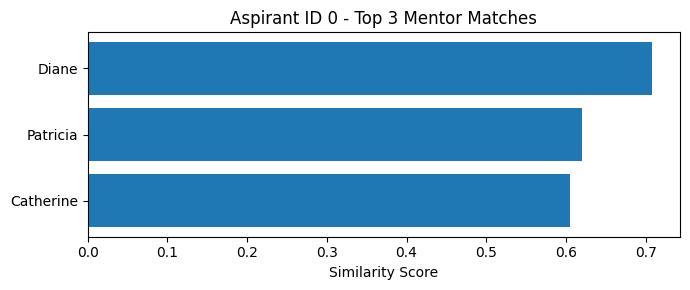

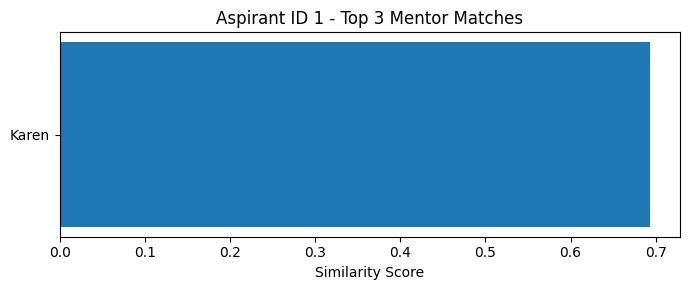

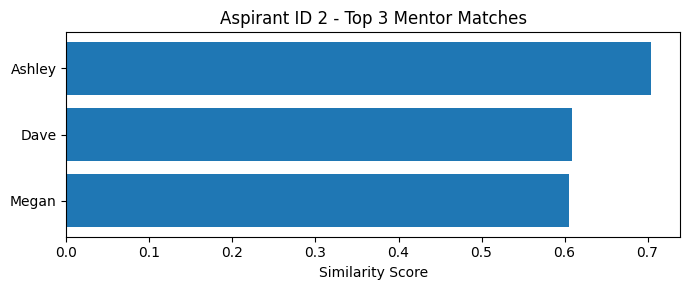

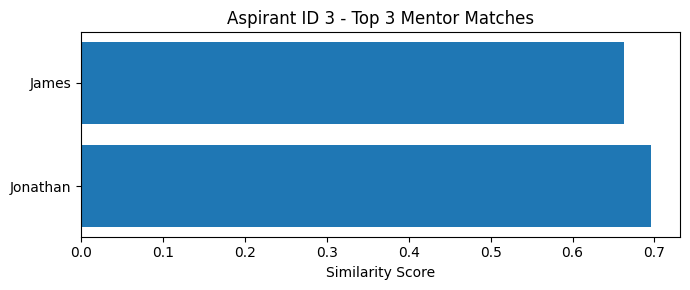

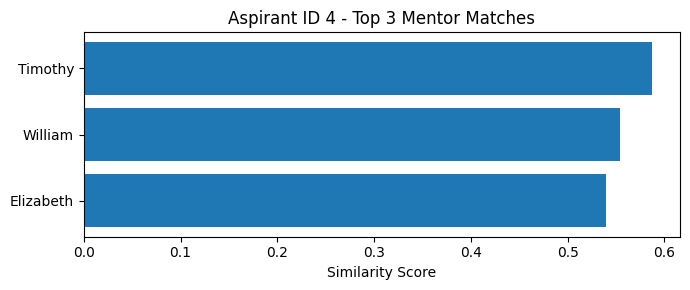

In [28]:
import matplotlib.pyplot as plt

# Visualize top 3 matches for first 5 aspirants
for i in range(5):
    aspirant_id = aspirants_df.iloc[i]['aspirant_id']
    sim_scores = semantic_sim_matrix[i]

    top_indices = np.argsort(sim_scores)[-3:][::-1]
    mentor_names = mentors_df.iloc[top_indices]['name'].values
    top_scores = sim_scores[top_indices]

    plt.figure(figsize=(7, 3))
    plt.barh(mentor_names[::-1], top_scores[::-1])
    plt.xlabel("Similarity Score")
    plt.title(f"Aspirant ID {aspirant_id} - Top 3 Mentor Matches")
    plt.tight_layout()
    plt.show()

In [29]:
from IPython.display import display, HTML

def display_top_mentors(aspirant_idx):
    sim_scores = semantic_sim_matrix[aspirant_idx]
    top_indices = np.argsort(sim_scores)[-3:][::-1]

    top_df = mentors_df.iloc[top_indices].copy()
    top_df['similarity_score'] = sim_scores[top_indices].round(3)
    top_df = top_df[['mentor_id', 'name', 'clat_rank', 'strength_subjects', 'teaching_style',
                     'preferred_mentee_level', 'similarity_score']]

    # Custom HTML style table
    styled = top_df.style.bar(subset=['similarity_score'], color='#5cb85c') \
                         .set_caption(f"Aspirant ID {aspirants_df.iloc[aspirant_idx]['aspirant_id']} - Top 3 Mentor Matches") \
                         .hide(axis="index")
    display(styled)

# Try this for aspirant 0
display_top_mentors(0)

mentor_id,name,clat_rank,strength_subjects,teaching_style,preferred_mentee_level,similarity_score
68,Diane,13789,"['Legal Reasoning', 'Logical Reasoning']",Visual,Intermediate,0.708000
89,Patricia,35900,"['Quantitative Techniques', 'Legal Reasoning', 'Logical Reasoning']",Visual,Beginner,0.620000
39,Catherine,437,"['Legal Reasoning', 'English Language']",Auditory,Intermediate,0.605000
